In [1]:
import numpy as np
from matplotlib import pyplot as plt
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import ts2xy
from stable_baselines3.common.monitor import load_results
from stable_baselines3 import A2C
%load_ext autoreload
%autoreload 2

In [5]:
# results_plotter.plot_results('saved_models', 1e5, results_plotter.X_TIMESTEPS, "Havelsan")

In [3]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

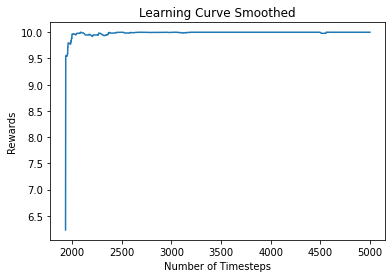

In [4]:
plot_results('saved_models')

In [47]:
model = A2C.load('saved_models/best_model.zip')

In [7]:
x, y = ts2xy(load_results('saved_models'), 'timesteps')

In [10]:
x

array([1378, 1663, 1664, ..., 4998, 4999, 5000], dtype=int64)